<a href="https://colab.research.google.com/github/linpohan/game/blob/main/%E8%BE%A8%E8%AD%98%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

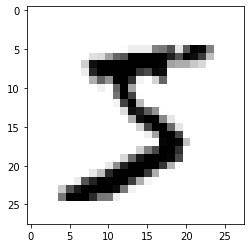

In [ ]:
plt.imshow(x_train[0], cmap='binary') #題目

In [ ]:
y_train[0] #答案

5

In [ ]:
t1 = x_train.reshape(60000, 784) #改變大小 將2維打散成1維, 784=28x28

In [ ]:
x_train = x_train.reshape(60000, -1) #等於t1

In [ ]:
t1.shape

(60000, 784)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
x_test = x_test.reshape(10000, -1)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_train = to_categorical(y_train, 10) #轉二進制(0~9)

In [ ]:
y_train[0] #5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential() #空的model

In [ ]:
model.add(Dense(20, input_dim=784, activation='relu')) # 輸入層 神經元素20個,總數量784,激活函式

In [ ]:
model.add(Dense(40, activation='relu')) #隱藏層 神經元需越大,使用倍數

In [ ]:
model.add(Dense(80, activation='relu')) #隱藏層 神經元需越大,使用倍數

In [ ]:
model.add(Dense(10, activation='softmax')) #輸出層 10個(0~9) softmax分類

In [ ]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.05), metrics=['accuracy']) # 組合層 (損失函示=mse平均方差 ,SGD梯形升降, 正確率

In [ ]:
model.summary() # 15700=784*20+20

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                15700     
                                                                 
 dense_6 (Dense)             (None, 40)                840       
                                                                 
 dense_7 (Dense)             (None, 80)                3280      
                                                                 
 dense_8 (Dense)             (None, 10)                810       
                                                                 
Total params: 20,630
Trainable params: 20,630
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_batch_size=0.2, batch_size=100, epochs=20) #訓練資料, 訓練答案, 驗證比率, 放多少資料, 訓練幾次

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0159 - accuracy: 0.8974
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0155 - accuracy: 0.8993
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9019
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0148 - accuracy: 0.9035
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9059
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 0.9076
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0140 - accuracy: 0.9099
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0138 - accuracy: 0.9111
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0135 - accuracy: 0.9123
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 0.9143

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0112 - accuracy: 0.9267


In [ ]:
score #(loss, 正確率)

[0.011219900101423264, 0.9266999959945679]